## **Exploratory Data Analysis**

#### **1. Basic info**

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df = pd.read_csv(r"C:\Users\Shahe\OneDrive\Desktop\ml_project\diabetes.csv") 

In [3]:
print("Shape:", df.shape)

Shape: (768, 9)


In [ ]:
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [17]:
print("Outcome counts:", )
display(df['Outcome'].value_counts())

Outcome counts:


Outcome
0    500
1    268
Name: count, dtype: int64

In [18]:
print("Outcome proportions:")
display(df['Outcome'].value_counts(normalize=True))

Outcome proportions:


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [20]:
cols_with_zeros = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
zero_counts = (df[cols_with_zeros] == 0).sum().sort_values(ascending=False)
print("\nZero counts (likely missing):")
zero_counts


Zero counts (likely missing):


Insulin          374
SkinThickness    227
BloodPressure     35
BMI               11
Glucose            5
dtype: int64

In [25]:
display(df.corr().round(3))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


## **Preprocessing**

In [ ]:
# replace zeros with NaN in features that shouldn't be zero
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

In [30]:
print("Missing after replace:")
df.isnull().sum()

Missing after replace:


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# calculating medians for imputation:
median_values = df[cols_with_zeros].median()
print(f"Calculated Medians:\n{median_values}")

Calculated Medians:
Glucose          117.0
BloodPressure     72.0
SkinThickness     29.0
Insulin          125.0
BMI               32.3
dtype: float64


In [ ]:
# impute (NaN) values with the calculated median:
df[cols_with_zeros] = df[cols_with_zeros].fillna(median_values)
print(f"Missing (NaN) counts after imputation:\n{df[cols_with_zeros].isnull().sum()}")

Missing (NaN) counts after imputation:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [41]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [50]:
# split the data into features and target variable:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Features shapes:")
print("X Shape:",X.shape)
print("Y Shape:",y.shape)
print("X train Shape:",X_train.shape)
print("X test Shape:",X_test.shape)
print("y train Shape:",y_train.shape)
print("y test Shape:",y_test.shape)


Features shapes:
X Shape: (768, 8)
Y Shape: (768,)
X train Shape: (614, 8)
X test Shape: (154, 8)
y train Shape: (614,)
y test Shape: (154,)


In [51]:
# Standardize the features, scaling to mean=0 and variance=1
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

print("Prepared shapes:", X_train_scaled.shape, X_test_scaled.shape)

Prepared shapes: (614, 8) (154, 8)


In [83]:
df.to_csv(r"C:\Users\Shahe\OneDrive\Desktop\ml_project\new_diabetes.csv", index=False)

## **Visual EDA**

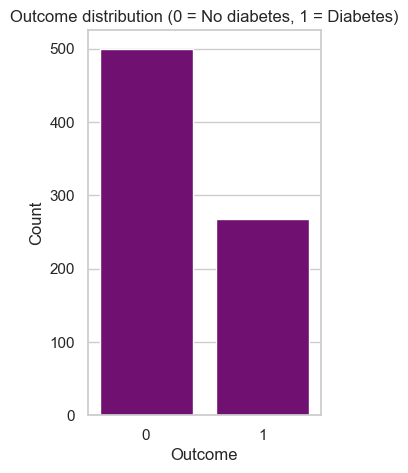

In [84]:
sns.set(style="whitegrid")

# Use the imputed dataframe from preprocessing step
df_plot = df.copy()

# 1) Outcome distribution (bar)
plt.figure(figsize=(3,5))
sns.countplot(data=df_plot, x='Outcome', color='purple')
plt.title('Outcome distribution (0 = No diabetes, 1 = Diabetes)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()



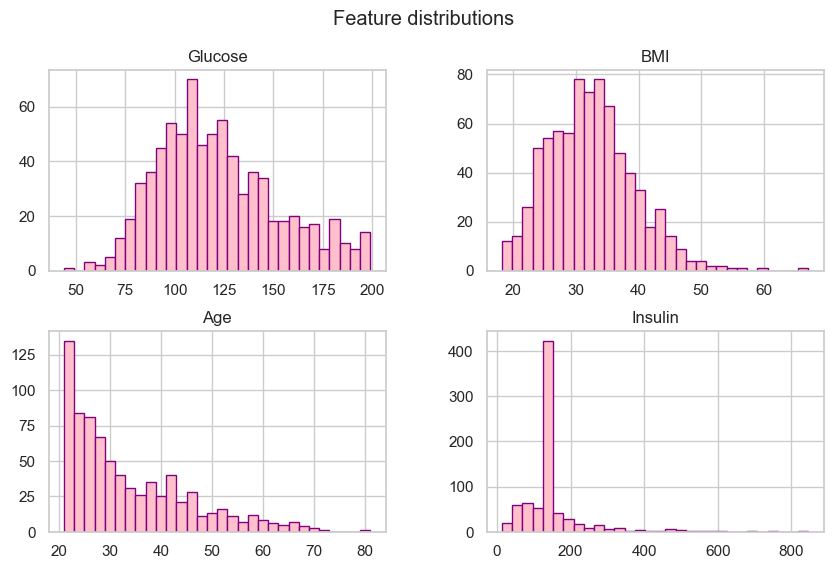

In [60]:
# Histograms of selected key features
key_feats = ['Glucose','BMI','Age','Insulin']
df_plot[key_feats].hist(bins=30, figsize=(10,6), color='pink', edgecolor='purple')
plt.suptitle('Feature distributions')
plt.show()

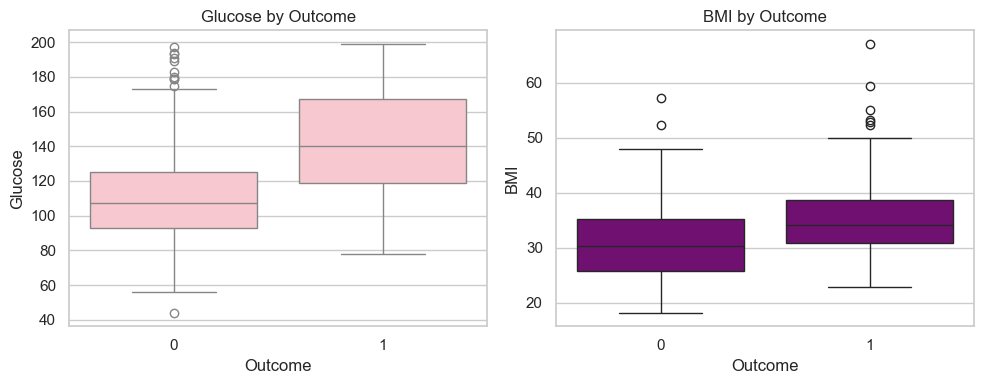

In [85]:
# Boxplots of features by outcome (Glucose & BMI are most informative)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='Outcome', y='Glucose', data=df_plot, color='pink')
plt.title('Glucose by Outcome')
plt.subplot(1,2,2)
sns.boxplot(x='Outcome', y='BMI', data=df_plot, color='purple')
plt.title('BMI by Outcome')
plt.tight_layout()
plt.show()

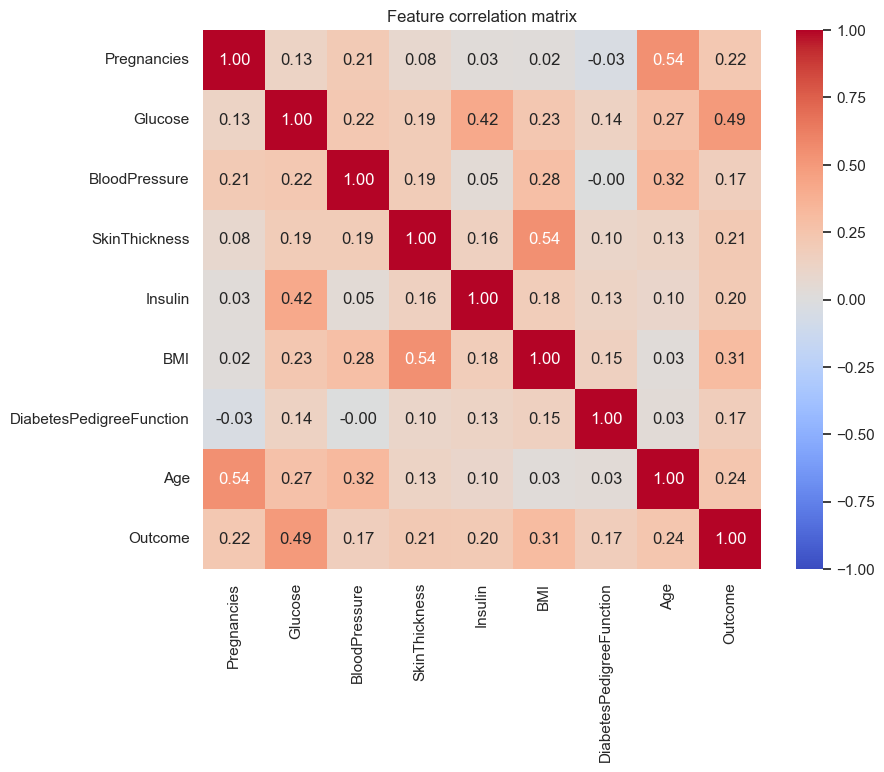

In [74]:
# Correlation heatmap
plt.figure(figsize=(9,7))
corr = df_plot.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature correlation matrix')
plt.show()

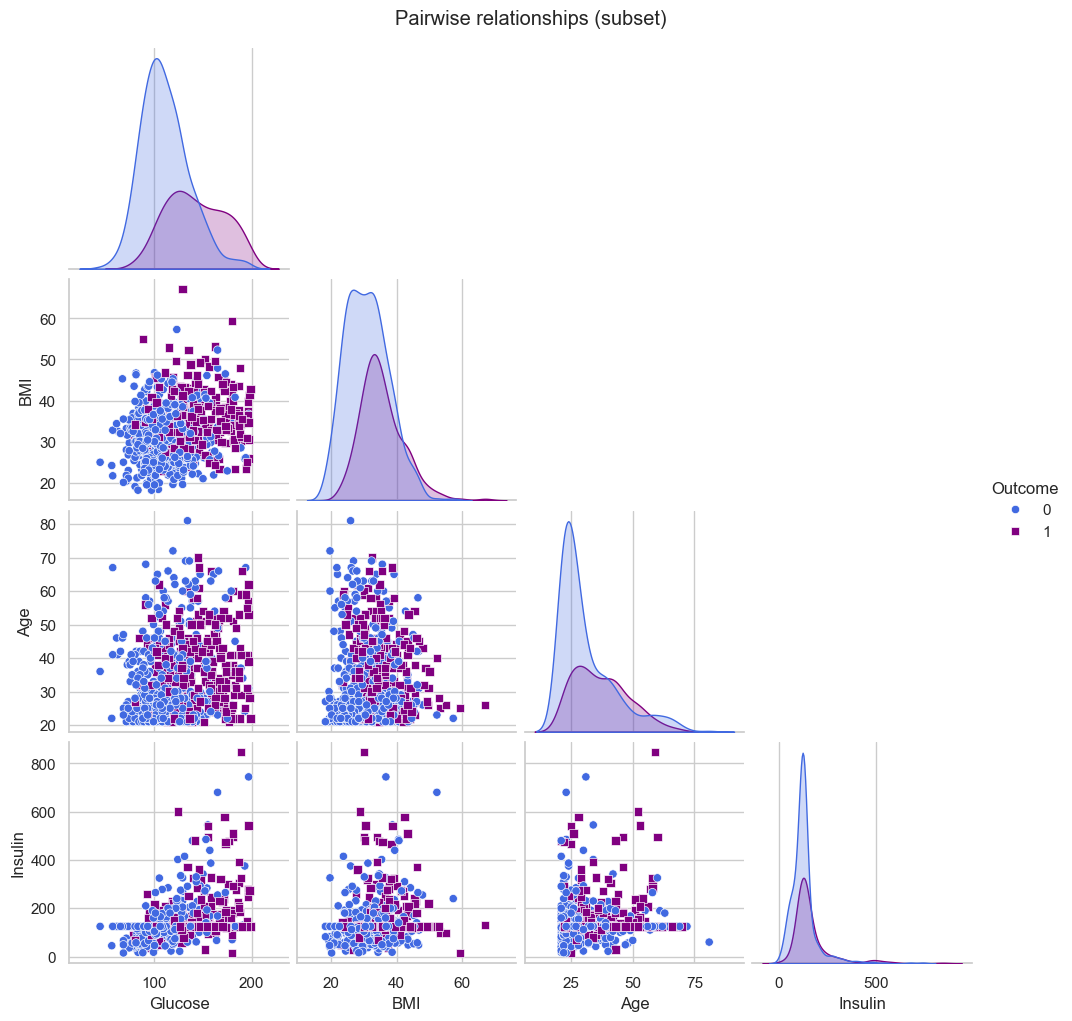

In [82]:
# Pairplot for a subset (useful but slow on big data)
subset = ['Glucose','BMI','Age','Insulin','Outcome']
sns.pairplot(df_plot[subset], hue='Outcome', markers=["o","s"], diag_kind='kde', corner=True, palette={0: "royalblue", 1: "purple"})
plt.suptitle('Pairwise relationships (subset)', y=1.02)
plt.show()